In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
import pickle
import gc
import seaborn
from matplotlib import pyplot as plt
from PIL import Image
import os

In [2]:
from input import DataInputTest
from model import Model

In [3]:
config = {
    'hidden_units': 128,
    'num_blocks': 1,
    'num_heads': 8,
    'dropout': 0.0,
    'regulation_rate': 0.00005,

    'itemid_embedding_size': 64,
    'cateid_embedding_size': 64,
    'input_image_emb_size': 64,
    'input_text_emb_size': 300,

    'concat_time_emb': True,

    # Training parameters
    'from_scratch': True,
    'model_dir': 'evaluate',
    'optimizer': 'sgd',
    'learning_rate': 1.0,
    'max_gradient_norm': 5.0,

    'train_batch_size': 32,
    'test_batch_size': 128,
    'max_epochs': 10,

    'display_freq': 100,
    'eval_freq': 10000,
}

In [4]:
with open('dataset.pkl', 'rb') as f:
    pickle.load(f)
    test_set = pickle.load(f)
    cate_list = pickle.load(f)
    user_count, item_count, cate_count = pickle.load(f)
    img_list, images = pickle.load(f)
    _, texts = pickle.load(f)

In [5]:
config['user_count'] = user_count
config['item_count'] = item_count
config['cate_count'] = cate_count

In [6]:
def create_model(sess, config, cate_list):
    model = Model(config, cate_list)

    ckpt = tf.train.get_checkpoint_state('dense_on_img_dropout_3')
    model.restore(sess, ckpt.model_checkpoint_path)
    return model

In [7]:
# CPUで実行
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [8]:
batch_size = config['test_batch_size']
print('Batch size: %d, %d batches' % (batch_size, int(len(test_set) / batch_size+0.5)))

Batch size: 128, 1503 batches


In [9]:
datt, eatt, mm_sel, all_hist_i, all_hist_r = [], [], [], [], []

i_img_att, i_text_att, i_all = 0, 0, 0

tf.reset_default_graph()
print('Starting Test...')

# Initiate TF session
with tf.Session() as sess:
    model = create_model(sess, config, cate_list)

    for i, uij in DataInputTest(test_set, batch_size, images, img_list, texts):
        # 各インスタンスのシーケンスの長さのリスト
        sl = uij[5]
        hist_i = uij[3]
        hist_r = uij[8]
        _, _, datt_1, eatt_1, datt_2, eatt_2, mm_sel_1, _ = model.test(sess, uij)

        # b_datt = np.concatenate((np.expand_dims(datt_1, 1), np.expand_dims(datt_2, 1)), axis=1)
        # b_eatt = np.concatenate((np.expand_dims(eatt_1, 1), np.expand_dims(eatt_2, 1)), axis=1)

        for j in range(mm_sel_1.shape[0]):
            # datt.append(b_datt[j])
            # eatt.append(b_eatt[j])
            mm_sel.append(mm_sel_1[j, :sl[j]])
            all_hist_i.append(hist_i[j, :sl[j]])
            all_hist_r.append(hist_r[j, :sl[j]])

        print('Processed batch %d' % i)

print('Finished', flush=True)

h 530
Processed batch 531
Processed batch 532
Processed batch 533
Processed batch 534
Processed batch 535
Processed batch 536
Processed batch 537
Processed batch 538
Processed batch 539
Processed batch 540
Processed batch 541
Processed batch 542
Processed batch 543
Processed batch 544
Processed batch 545
Processed batch 546
Processed batch 547
Processed batch 548
Processed batch 549
Processed batch 550
Processed batch 551
Processed batch 552
Processed batch 553
Processed batch 554
Processed batch 555
Processed batch 556
Processed batch 557
Processed batch 558
Processed batch 559
Processed batch 560
Processed batch 561
Processed batch 562
Processed batch 563
Processed batch 564
Processed batch 565
Processed batch 566
Processed batch 567
Processed batch 568
Processed batch 569
Processed batch 570
Processed batch 571
Processed batch 572
Processed batch 573
Processed batch 574
Processed batch 575
Processed batch 576
Processed batch 577
Processed batch 578
Processed batch 579
Processed batc

In [10]:
propotion = np.zeros((len(mm_sel), max([len(i) for i in mm_sel]), 2), dtype=np.float32)

In [11]:
for i in range(len(mm_sel)):
    propotion[i, :mm_sel[i].shape[0]] = mm_sel[i]

In [12]:
propotion.sum(axis=(0, 1))

array([  10094.003, 1488961.2  ], dtype=float32)

In [13]:
i_img_att, i_text_att = 0, 0
propotion = np.zeros(len(mm_sel))
for i in range(len(mm_sel)):
    summed = mm_sel[i].sum(axis=0)
    i_img_att += summed[0]
    i_text_att += summed[1]
    propotion[i] = summed[0] / (summed[0] + summed[1] + 0.001)
print(i_img_att, i_text_att, i_img_att/(i_img_att+i_text_att))

10114.754694428157 1486670.251933813 0.0067576536707922635


(array([1.29519e+05, 2.85040e+04, 1.28010e+04, 6.93500e+03, 4.10400e+03,
        2.61100e+03, 1.80000e+03, 1.38100e+03, 9.66000e+02, 7.46000e+02,
        5.71000e+02, 4.46000e+02, 3.66000e+02, 2.85000e+02, 2.79000e+02,
        1.63000e+02, 1.72000e+02, 1.31000e+02, 8.10000e+01, 6.80000e+01,
        1.38000e+02, 6.20000e+01, 2.90000e+01, 1.90000e+01, 3.70000e+01,
        1.23000e+02, 1.70000e+01, 1.20000e+01, 9.00000e+00, 6.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 4.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([9.89394797e-10, 5.00114619e-03, 1.00022914e-02, 1.50034366e-02,
        2.00045818e-02, 2.50057270e-02, 3.00068722e-02, 3.50080174e-02,
        4.00091626e-02, 4.50103078e-02, 5.00114530e-02, 5.50125982e-02,
        6.00137434e-02, 6.50148886e-02, 7.00160339e-

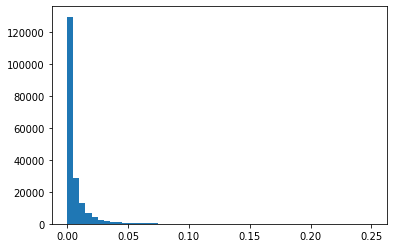

In [14]:
plt.hist(propotion, 50)

In [15]:
import pickle
with open('../raw_data/remap.pkl', 'rb') as f:
  pickle.load(f)
  pickle.load(f)
  pickle.load(f)
  asin_key, cate_key, revi_key = pickle.load(f)
  img_list, img_key = pickle.load(f)
  text_list, text_key = pickle.load(f)

In [16]:
with open('../raw_data/meta.pkl', 'rb') as f:
    meta = pickle.load(f)
    meta = meta.sort_values('asin')

In [17]:
def get_title(hist_i):
    keys = np.array(meta.title, dtype=object)
    return keys[hist_i]

In [18]:
def get_image(hist_i):
    keys = np.array(img_key)[img_list[hist_i]]
    return [Image.open('../raw_data/images/' + key) for key in keys]

In [19]:
def get_review_text(hist_r):
    keys = np.array(text_key, dtype=object)
    return keys[hist_r]

In [20]:
median = np.where(propotion == np.median(propotion))[0]
median = median[int(median.shape[0] / 2)]

In [21]:
mm_sel[median]

array([[1.1310192e-02, 9.8868984e-01],
       [7.4043322e-07, 9.9999928e-01],
       [6.1102695e-04, 9.9938893e-01],
       [2.3841736e-04, 9.9976164e-01],
       [4.8110258e-05, 9.9995184e-01]], dtype=float32)

<AxesSubplot:>

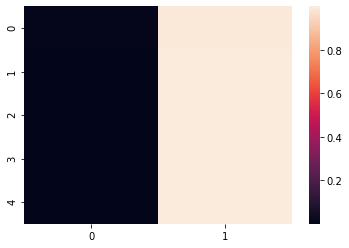

In [22]:
seaborn.heatmap(mm_sel[median])

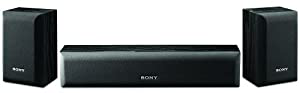

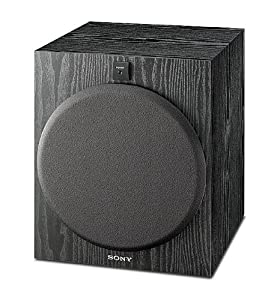

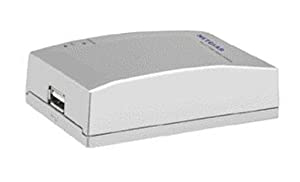

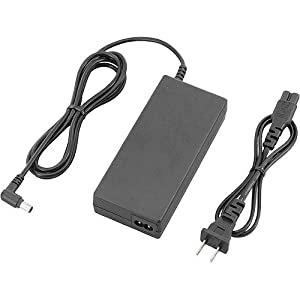

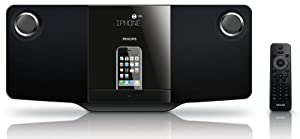

In [23]:
for image in get_image(all_hist_i[median]):
    display(image)

In [24]:
print(*get_title(all_hist_i[median]), sep='\n')

Sony SS-CR3000 Center and Rear Channel Speaker Package
Sony SA-W2500 Performance Line 100 Watt Subwoofer
NETGEAR PS121 USB 2.0 Mini Print Server
Sony VAIO VGP-AC19V10 Notebook PC AC Adapter
Philips DCM278/37 Micro Hi-Fi System Dock with CD for iPod/iPhone


In [25]:
print(*get_review_text(all_hist_r[median]), sep='\n')

Works well - I only needed the center speaker.  I wish I could have purchased only the center speaker.  What will I do with the left and right speakers?  Good performance with the Sony receiver.
Works well.  Base at the level I need in this room.  Not too loud - not to soft - just right.  The first shipment I received was crushed in original packaging.  I was forced to return and wait another week.  The return process went well with Amazon.
This product was a disaster.  I hate is when you spend a few hours trying to figure out how to make a product work land find in the end it is incompatible with your system. I sent this one back for a credit - waste of at least 3 hours of my time.
I use this all the time when I travel.  You cannot count on you battery for a moment.  I use a port replicator at my office so this one is always in my travel case.  Works as expected.
Bought this for our daughter for Christmas.  Very good sound for the price and her bedroom.  This may work well for her in 

In [26]:
most_high_prop = np.argmax(propotion)

In [27]:
mm_sel[most_high_prop]

array([[5.0000000e-01, 5.0000000e-01],
       [7.3566014e-05, 9.9992645e-01],
       [4.0554791e-04, 9.9959451e-01],
       [5.0000000e-01, 5.0000000e-01]], dtype=float32)

<AxesSubplot:>

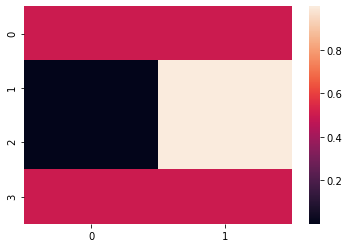

In [28]:
seaborn.heatmap(mm_sel[most_high_prop])

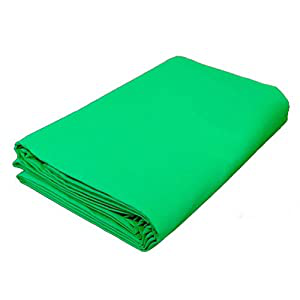

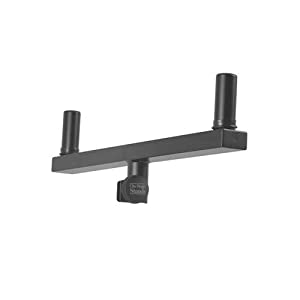

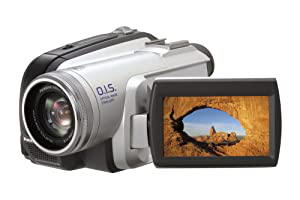

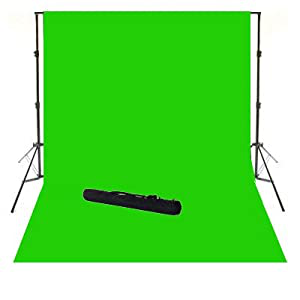

In [29]:
for image in get_image(all_hist_i[most_high_prop]):
    display(image)

In [30]:
print(*get_title(all_hist_i[most_high_prop]), sep='\n')

CowboyStudio 10 X 20 Feet Chormakey Green Muslin Backdrop, Seamless with a 4 inch Rod Pocket
On Stage SS7920 Dual Mount Speaker Bracket
Panasonic PV-GS80 MiniDV Camcorder with 32x Optical Image Stabilized  Zoom
ePhoto 10' X 12' Video Photography Studio Chroma Key Chromakey Green Screen Cotton Muslin Backdrop Seamless and Background Supporting System Kit with Carrying Case


In [31]:
print(*get_review_text(all_hist_r[most_high_prop]), sep='\n')


This product is exactly as I hoped it was described.  I see no faults in craftsmanship or quality and I don't expect to in the long term.  It is a very well made product.
Exactly what I needed it for.  Great price and brand new.  I got lucky that they were selling it when I was looking for just this item.  Only criticism would be that the packaging was very fragrant (perfume?  patchouli oil?) on the outside and this fragrance was even on the product inside the brand new box.  This creates a problem for me as my wife has asthma so I need to wait for it to air out before I can actually use it on a regular basis.  Other than that, I'm happy with the purchase.
Great addition to our green screen options and our film studio in-the-making in general.
